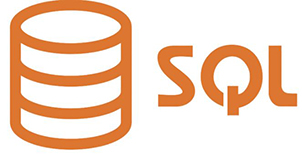

--- 

---

<font color = lightseagreen size=6><b> 1ere partie : Créer et Modifier la base
    </b></font>
    
---

---


Dans tout ce TP nous allons utiliser une base de donnée contenant 3 tables :

La table  <FONT face = "courier new" size = 3>personnages(<u>id : INTEGER</u>, nom : TEXT, #dans_titre : INTEGER, age : FLOAT)</FONT>

L'attribut <FONT face = "courier new" size = 3>dans_titre</FONT> de la table <FONT face = "courier new" size = 3>personnages </FONT>est une clef étrangère qui fait référence à l'attribut <FONT face = "courier new" size = 3>id</FONT>, clef primaire de la table <FONT face = "courier new" size = 3>titres</FONT> :

La table <FONT face = "courier new" size = 3>titres(<u>id: INTEGER</u> , titre:TEXT ,#auteur:INTEGER, annee_sortie: INTEGER)</FONT>

L'attribut <FONT face = "courier new" size = 3>auteur</FONT> de la table <FONT face = "courier new" size = 3>titre</FONT> est une clef étrangère qui fait référence à l'attribut <FONT face = "courier new" size = 3>id</FONT>, clef primaire de la table <FONT face = "courier new" size = 3>auteurs</FONT> :



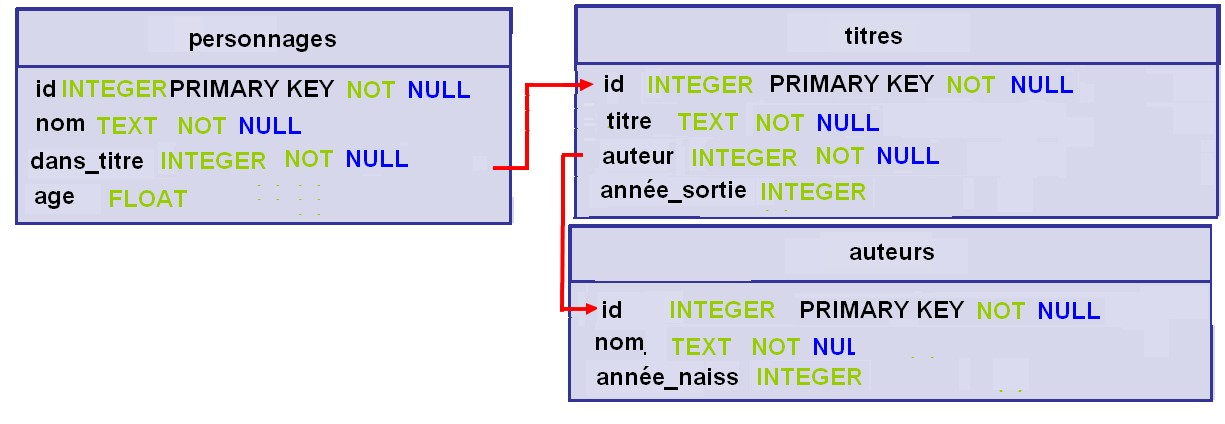

## I. Création des tables

<div class="alert alert-danger" role="alert">
    à retenir : 
    <ul><li>les mots clefs <b>DROP TABLE IF EXIST</b> et <b>CREATE TABLE</b> </li>
        <li>Les types : <b>TEXT INTEGER VARCHAR(n)</b></li>
        <li>Les mots clefs <b>REFERENCES</b> et <b>PRIMARY KEY</b>
        <li>Les contraintes : <b>NOT NULL</b></b></li>
    </ul>
</div>


In [ ]:
-- création de la table auteurs :
DROP TABLE IF EXISTS auteurs;
CREATE TABLE auteurs (
    id INTEGER PRIMARY KEY NOT NULL,
    nom TEXT NOT NULL ,
    année_naiss INTEGER
    );

In [ ]:
/* création de la table titres */
DROP TABLE IF EXISTS titres;
CREATE TABLE titres (
    id INTEGER PRIMARY KEY NOT NULL, 
    titre TEXT NOT NULL, 
    auteur INTEGER NOT NULL REFERENCES Auteurs (id) ,
    annee_sortie INTEGER 
    );

## II. Remplissage des tables



<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>INSERT INTO</b> table <br>
(descripteurs)<br>
    <b>VALUES</b> <br>
( .. , .. , .. ), <br>
( .. , .. , .. ), <br>
... <br>
</ul>
</div>


Nous allons utiliser le modèle relationnel ci-dessus pour enregistrer ces données :

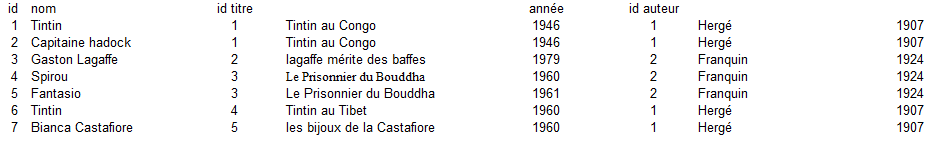

In [ ]:
-- ajout des 2 auteurs
INSERT INTO auteurs
VALUES
(1, 'Hergé', 1907),
(2, 'Franquin', 1924);

Dans la table <FONT face = "courier new" size = 3>titres</FONT>, nous allons créer 5 titres. Les auteurs  seront des références vers la table <FONT face = "courier new" size = 3>auteurs</FONT>.

Nous avons 2 auteurs :

**1 : Hergé**

**2 : Franquin**

In [ ]:
INSERT INTO titres
(id, titre, auteur, annee_sortie)
VALUES 
(1, 'Tintin au Congo', 1, NULL), -- date de sortie inconnue
(2, 'Lagaffe mérite des baffes', 2, 1979),
(3, 'Le prisonnier du Bouddha', 2, 1960),
(4,'Tintin au Tibet', 1, 1960);



### L'intérêt d'une contrainte d'unicité

Si une personne étourdie essaye d'ajouter un titre avec une id déjà existante :

In [ ]:
INSERT INTO titres
(id, titre, auteur, annee_sortie)
VALUES
(4, 'Les bijoux de la Castafiore', 1, 1960);

Alors insérons Bianca quand même :

In [ ]:
INSERT INTO titres
(id, titre, auteur, annee_sortie)
VALUES
(5, 'Les bijoux de la Castafiore', 1, 1960);

### III. Mise à jour d'une table 

<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>UPDATE</b> table <br>
<b>SET</b> descripteur = valeur<br>
<b>WHERE</b> condition;

<b>DELETE FROM</b> table <br>
<b>WHERE</b> condition;
</ul>
</div>


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 1</font></b> 
 
 **Modifiez l'année de sortie de "Les bijoux de la Castafiore**

On a fait une erreur, ce titre est paru en 1963. Corrigez la base !

In [ ]:
-- Les bijoux de la Castafiore est parru en 1963 : corrigeons
UPDATE titres
SET annee_sortie = 1963
WHERE titre = "Les bijoux de la Castafiore";

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 2</font></b> 
 
 **Créez la table personnages**



On vous remet le schéma de la base de données ici :


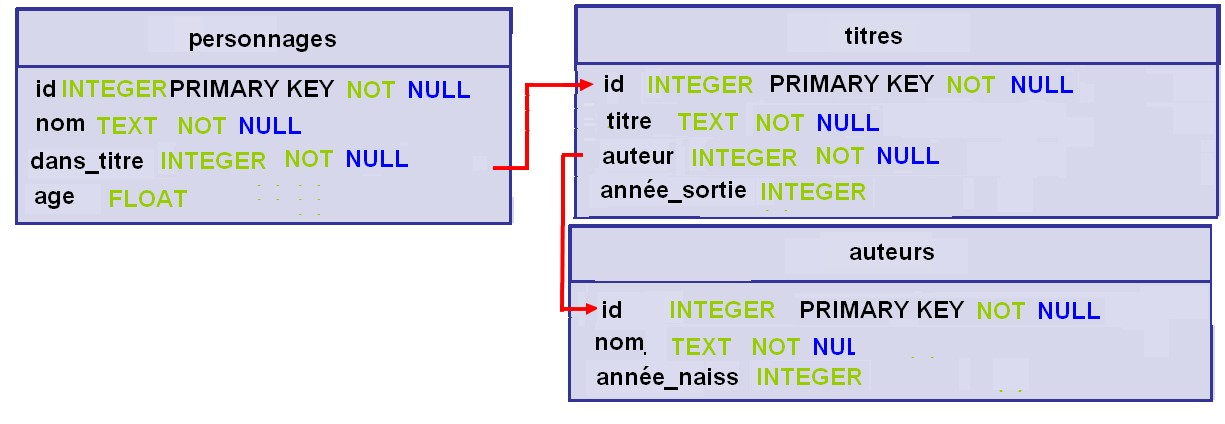

In [ ]:
/* création de la table personnages */
DROP TABLE IF EXISTS personnages;
CREATE TABLE personnages (
    id INTEGER PRIMARY KEY NOT NULL,
    nom TEXT NOT NULL,
    dans_titre INTEGER NOT NULL
    REFERENCES titres(id), ---  l'attribut dans_titre est clef étrangère qui refère à 
                               ---  la clef primaire id de la table titres 
    age FLOAT  
                 
    );

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 3</font></b> 
 
 **Remplir la table personnages**


On vous remet le tableau des données ici :


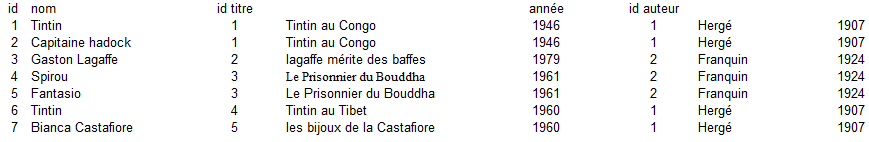

Et l'âge des héros :  

|Personnage|âge|  
|:--|:--|  
|Tintin|25|
|Capitaine Hadock|41|
| Gaston Lagaffe|19  |  
| Spirou| 17 |  
| Bianca Castafiore| 55 |  
| Fantasio| 20 | 
  

Ci dessous les insertions des personnages :

In [ ]:
/* remplissage de la table personnages */
INSERT INTO personnages
(id, nom, dans_titre, age)
VALUES
(1, 'Tintin', 1, 25), 
(2, 'Capitaine Hadock', 1, 41),
(3, 'Gaston Lagaffe', 2, 19),
(4, 'Spirou', 3, 17),
(5, 'Fantasio', 3, 20 ),
(6, 'Tintin', 4, 25),
(7, 'Bianca Castafiore', 5, 55);


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 4</font></b> 
 
 **Mettre à jour les 3 tables pour ajouter ce titre :**



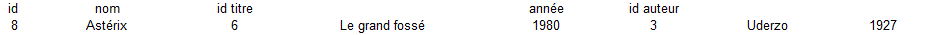

(Asterix a 35 ans)

On rappelle le schéma relationnel :
<pre>
table personnages(<u>id</u>, nom, #dans_titre, age) 

table titres(<u>id</u>, titre, #auteur, annee_sortie) 

table auteurs( <u>id</u>, nom, année_naiss) 
</pre>


In [ ]:
-- Il faut commencer par l'auteur, puis le titre, avant d'insérer le personnage

INSERT INTO auteurs
VALUES
(3, 'Uderzo', 1927);

INSERT INTO titres
VALUES
(6, 'Le Grand Fossé', 3, 1980);

INSERT INTO personnages
VALUES
(8, 'Asterix', 6, 35);

--- 

---

<font color = lightseagreen size=6><b> 2ème partie : Consultation
    </b></font>
    
---

---


<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>SELECT</b> * (ou 
    <b>SELECT</b> liste de descripteurs séparés par des <b>,</b>) <br>
<b>FROM</b> table<br>
<b>WHERE</b> condition;
</div>


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 5</font></b> 
 
 **Affichez toute la table personnages**

In [ ]:
-- sans le WHERE
SELECT * 
FROM personnages;

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 6</font></b> 
 
 **Affichez les personnages de moins de 30 ans**

In [ ]:
-- avec un WHERE
SELECT * 
FROM personnages
WHERE age < 30;

<div class="alert alert-danger" role="alert">
    <b> à retenir : les conditions courantes :</b>

&lt;nom_attribut> \[=, >, <, <=, >=\] &lt;valeur><br>
    exemple : nom = 'Tintin' ou age > 20<br>
    
&lt;nom_attribut> LIKE <chaîne de caractères avec des caractères génériques comme % ou _><br>
    exemple : nom LIKE 'T%' ou nom LIKE '%i%";
</div>


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 7</font></b> 
 
 **Affichez les personnages qui sont dans le titre 1**

In [ ]:
-- les personnages qui sont dans le titre 1 :
SELECT *
FROM personnages
WHERE dans_titre = 1;


## Fonctions d'aggrégation

Une fois le résultat d'une requête SELECT obtenu, on peut lui appliquer une fonction d'aggrégation, appelée ainsi parce qu'elle va retourner un seul résultat à partir d'une pluralité. 

Dans une telle requête, il faut bien décomposer les choses pour construire la requête : d'abord, le résultat qui va faire un certain nombre de lignes, puis la fonction d'aggrégat qui est appliquée sur ce résultat. 



 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 8</font></b> 
 
 **Affichez le nombre d'enregistrements dans la table personnages**

In [ ]:
/* Sans le where : compte tous les enregistrements */
SELECT count (*)
FROM personnages;


Lorsqu'on veux compter le nombre d'enregistrements qui satisfont un critère il faut faire attention :

In [ ]:
/* pas bon !*/
SELECT count (annee_sortie)
FROM titres
WHERE auteur = 1;

Patatras ! ce n'est pas le nombre, car `count` ne compte que les valeurs non nulles et certains titres n'ont pas l'année renseignée. Il vaut mieux compter le nombre d'id ou le nombre de lignes complètes, tout simplement. 

In [ ]:
SELECT count (*)
FROM titres
WHERE auteur = 1;

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 9</font></b> 
 
 **Affichez le nombre d'apparitions de Tintin dans la table personnages**

In [ ]:
SELECT count(*)
FROM personnages
WHERE nom = 'Tintin';

<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre d'enregistrement de la table : <b>count(*)<br>
<b>SELECT</b> count(*)<br>
    <b>FROM</b> table<br>
<b>WHERE</b> condition;
</div>


In [ ]:
-- on remet la table titres complète
SELECT * 
FROM titres;

`count` compte bien le nombre de lignes non nulles. Par ex, si on veut savoir le nombre d'année ou des
titres sont parues dans la table *titres*

In [ ]:
/* pas bon */
SELECT count (annee_sortie)
FROM titres;

patatras ! Il n'y a pas 5 années différentes. 

Mais quand on fait une projection sur la colonne *annee_sortie*, on récupère bien 5 lignes, **dont 2 sont identiques.** 

In [ ]:
SELECT annee_sortie
FROM titres;

Il faut utiliser le mot clé **DISTINCT**.

In [ ]:
SELECT DISTINCT annee_sortie
FROM titres;




In [ ]:
SELECT count (DISTINCT annee_sortie)
FROM titres;

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 10</font></b> 
 
 **Affichez le nombre de personnages (en ne les comptant qu'une seule fois chacun)**

In [ ]:
SELECT count (DISTINCT nom)
FROM personnages;


SELECT count (DISTINCT attribut)
FROM titres;
<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre de valeur distincte d'un descripteur : <b>count(DISTINCT descripteur)<br>
<b>SELECT</b> count(DISTINCT attribut)<br>
    <b>FROM</b> table<br>;
</div>


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 11</font></b> 
 
 **Affichez (une seule requête) les âges minimum, maximum, moyen et la somme des ages des personnages**

Les fonctions **MAX, MIN, AVG, SUM** ont un fonctionnement similaire. 

In [ ]:
SELECT MIN(age), MAX(age), AVG(age), SUM(age)
FROM personnages;


<div class="alert alert-danger" role="alert">
    à retenir : MIN MAX et AVG <br>
<b>SELECT</b> MIN(attribut)<br>
    <b>FROM</b> table;<br>
</div>


### Tri des résultats

Ajouter **ORDER BY <nom_colonne>** pour trier les résultats dans l'ordre croissant des valeurs de nom_colonne. 
Ajouter **DESC** pour un ordre décroissant. 

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 12</font></b> 
 
 **Affichez les noms de tous les personnages (sans doublons) triés par ordre alphabétique croissant**

In [ ]:
SELECT DISTINCT nom
FROM personnages
ORDER BY nom ;

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 13</font></b> 
 
 **Affichez les noms et l'age de tous les personnages (sans doublons) triés par ordre d' âge décroissant**

In [ ]:
SELECT nom, age
FROM personnages
ORDER BY age DESC ;

<div class="alert alert-danger" role="alert">
    à retenir : pour trier (croissant par défaut, ou décroissant avec DESC)<br>
<b>SELECT</b> *<br>
<b>FROM</b> table<br>
    <b>ORDER BY</b> descripteur <b>&lt;DESC></b>;
</div>


--- 

---

<font color = lightseagreen size=6><b> 3ème partie : Jointures
    </b></font>
    
---

---

Il arrive que l'information sur une entité soit dispersée dans deux tables. On doit alors utiliser une jointure. 

Par ex. **Quel est le titre de l'entrée 1 de la table personnage  ?**

Quand l'information est dispersée dans deux tables T1 et T2, la jointure consiste à constuire une table contenant les 2.

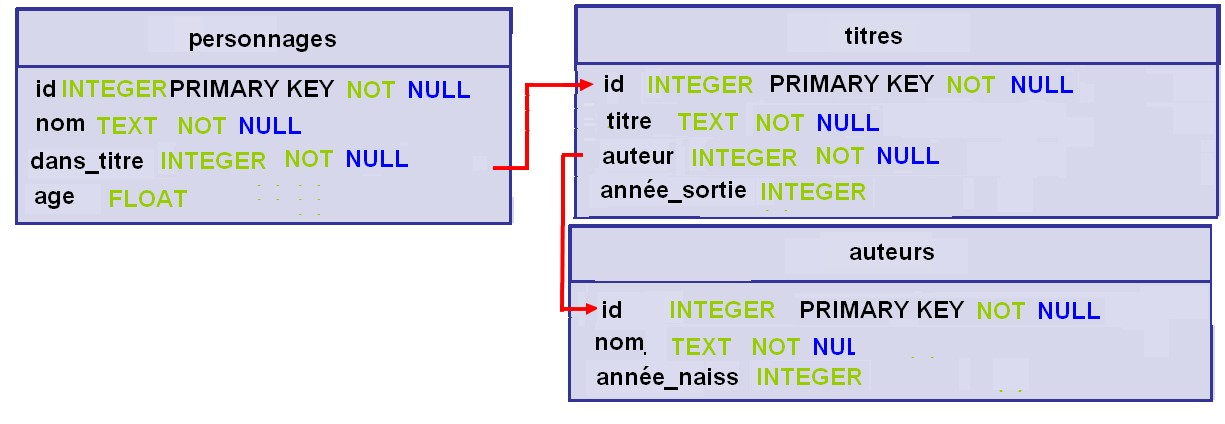

L'exemple est simplifié, mais évidement, chacune des 3 tables pourrait contenir bien plus d'attributs. 

Par exemple, dans Titres, on pourrait avoir les dates de rééditions, le nom de l'éditeur, le nombre de pages, une indication si l'ouvrage est en N&B ou couleurs, etc...

Dans auteurs on pourrait avoir la date du décès, la nationalité, le lieu de naissance etc...

Tout ces renseignements ne doivent pas être répétés. par exemple, Tintin apparait dans de nombreux titres, il serait incorrect de créer une table ou à chaque entrée de Tintin on recopie toutes les informations de Hergé ! 

De même, plusieurs personnages apparaissent dans chaque Titre. Il ne serait pas du tout efficace que l'on recopie les information du titre pour chaque personnage.

Les 3 bases ci-dessus ne contiennent pas d'information en double, hormis les clés <b>id</b>

In [ ]:
SELECT * 
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id;

<div class="alert alert-danger" role="alert">
    à retenir : pour faire la jointure<br>
<b>SELECT</b> *<br>
<b>FROM</b> table1<br>
    <b>JOIN</b> table2 <b>ON</b>  table1.attribut_1 = table2.attribut_2;
</div>


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 14</font></b> 
 
 **Quels sont les personnages qui appraissent dans Tintin au Congo ?**

In [ ]:
SELECT * 
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
WHERE titre = "Tintin au Congo";

 👉 **On peut faire plusieurs jointures :**


In [ ]:
SELECT * 
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
JOIN auteurs ON titres.auteur = auteurs.id;


 **Affichez les noms des personnages d' Hergé ?**

In [ ]:
/* pas bon */
SELECT nom
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
JOIN auteurs ON titres.auteur = auteurs.id
WHERE nom = 'Hergé';

pourquoi la colonne nom est elle ambigue ?

**Réponse :** Il y a une colonne nom dans la table personnages et une autre dans la table auteurs...

✏️ **Préciser dans quelle table on veux sélectionner**

Ceci est valable aussi bien pour SELECT que pour WHERE ou par exemple ORDER BY

In [ ]:
/* levons l'ambiguité */
SELECT personnages.nom
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
JOIN auteurs ON titres.auteur = auteurs.id
WHERE auteurs.nom = 'Hergé';

Oui mais du coup, si on veux extraire le nom du personnage et le nom de l'auteur ça va donner ceci :

In [ ]:
SELECT personnages.nom, auteurs.nom 
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
JOIN auteurs ON titres.auteur = auteurs.id
WHERE auteurs.nom = 'Hergé';

✏️ **On peut renommer les colonnes :**

In [ ]:
SELECT personnages.nom, titres.titre, auteurs.nom as auteur, annee_sortie AS année
FROM personnages
JOIN titres ON personnages.dans_titre = titres.id
JOIN auteurs ON titres.auteur = auteurs.id
WHERE auteurs.nom = 'Franquin';

<div class="alert alert-danger" role="alert">
    à retenir : <b>la notation table.column</b><br>

Il arrive fréquement que l'on utilise 2 tables dans lesquelles on trouve des attributs nommé de façon identique.
    Il peut aussi arriver qu'on souhaite renommer des colonnes avec le mot cle <b>AS</b>
</div>


--- 

---

<font color = lightseagreen size=6><b> Le résumé
    </b></font>
    
---

---


## I. Création des tables

<div class="alert alert-danger" role="alert">
    à retenir : 
    <ul><li>les mots clefs <b>DROP TABLE IF EXISTS</b> et <b>CREATE TABLE</b> </li>
        <li>Les types : <b>TEXT INTEGER VARCHAR(n)</b></li>
        <li>Les mots clefs <b>REFERENCE</b> et <b>PRIMARY KEY</b>
        <li>Les contraintes : <b>NOT NULL</b> 
    </ul>
</div>



<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>INSERT INTO</b> table <br>
(descripteurs)<br>
    <b>VALUES</b> <br>
( .. , .. , .. ),<br>
( .. , .. , .. ),<br>
... <br>
</ul>
</div>



<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>UPDATE</b> table <br>
<b>SET</b> descripteur = valeur<br>
<b>WHERE</b> condition;

<b>DELETE FROM</b> table <br>
<b>WHERE</b> condition;
</ul>
</div>


## II. consulter


<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>SELECT</b> * (ou 
    <b>SELECT</b> liste de descripteurs séparés par des <b>,</b>) <br>
<b>FROM</b> table<br>
<b>WHERE</b> condition;
</div>


<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre d'enregistrement de la table : <b>count(*)<br>
<b>SELECT</b> count(*)<br>
    <b>FROM</b> table<br>
<b>WHERE</b> condition;
</div>


<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre de valeur distincte d'un descripteur : <b>count(DISTINCT descripteur)<br>
<b>SELECT</b> count(DISTINCT descripteur)<br>
    <b>FROM</b> table<br>;
</div>


<div class="alert alert-danger" role="alert">
    à retenir : pour trier (croissant par défaut, ou décroissant avec DESC)<br>
<b>SELECT</b> *<br>
<b>FROM</b> table<br>
    <b>ORDER BY</b> descripteur <b>&lt;DESC></b>;
</div>


<div class="alert alert-danger" role="alert">
    à retenir : MIN MAX et AVF <br>
<b>SELECT</b> MIN(attribut)<br>
    <b>FROM</b> table;<br>
</div>


## III Jointures
<div class="alert alert-danger" role="alert">
    à retenir : pour faire la jointure<br>
<b>SELECT</b> *<br>
<b>FROM</b> table1<br>
    <b>JOIN</b> table2 <b>ON</b>  table1.attribut1 = table2.attribut2;
</div>


---

**Auteurs :**  Jean-Louis Thirot et Mireille Coilhac

---
<center>
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
</center>